In [1]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
import xgboost as xgb

In [5]:
from keras.callbacks import ModelCheckpoint,CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [6]:
from matplotlib import pyplot
%matplotlib inline

In [7]:
year = pd.read_csv("../11_hour_merged_data.csv")
X = year.drop(columns=['GHI'])
Y = year.pop('GHI')

transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)


# print(transformer)
# print(X_norm)

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=test_size, random_state=seed)

### Checking for the number of hidden nodes and number of hidden layers in neural network



In [8]:
# NN_model_1, NN_model_2, NN_model_3, NN_model_4, NN_model_5, NN_model_6, NN_model_7, NN_model_8, NN_model_9, NN_model_10 = Sequential()
# models = [NN_model_1, NN_model_2, NN_model_3, NN_model_4, NN_model_5, NN_model_6, NN_model_7, NN_model_8, NN_model_9, NN_model_10]

# for counter, model in enumerate(models):
#     model.add(Dense(20, kernel_initializer='normal', input_dim = X.shape[1], activation='relu'))
#     if counter + 1 == 2:
#         model.add(Dense(40,kernel_initializer='normal', activation='relu'))
#     if counter + 1 == 3:
#         model.add(Dense(60,kernel_initializer='normal', activation='relu'))
#     models.add(Dense(1))
    

In [14]:
NN_model_1 = Sequential()

# The Input Layer :
NN_model_1.add(Dense(32, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_1.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(512, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_1.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 175,745
Trainable params: 175,745
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the network :
NN_model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
csv_logger = CSVLogger('NN_model_archi2.log')
history = NN_model_1.fit(X_norm, Y, verbose=0, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


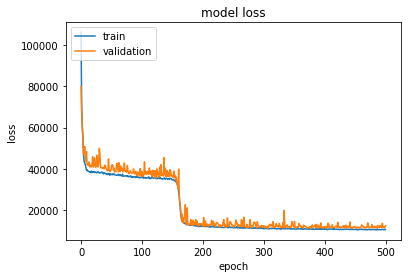

In [16]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()